In [1]:
from pylab import *
from slamseq_exper_sim import *
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.stats import norm as normal
import pandas as pd

## Data Synthesis using Gillespie

In [2]:
r = 15; tau = 0.7;
b = 0.5*r/tau; K = 25*r; n = 2.5; beta = 0.5/tau; gamma = 0.2/tau; eta = 0.5/tau;  delta = 0.05/tau;
a_ut = 1.0*r/tau
a_t = 0.5*r/tau
params_untreat_unlab = {'a1': a_ut, 'b1': b, 'a2': a_ut, 'b2': b, 'a1_l': 0, 'b1_l': 0, 'a2_l': 0, 'b2_l': 0, 'K': K, 'n': n, 
                'be1': beta, 'ga1': gamma, 'et1': eta, 'de1':delta,
                'be2': beta, 'ga2': gamma, 'et2': eta, 'de2':delta}
params_treat_unlab = {'a1': a_t, 'b1': b, 'a2': a_t, 'b2': b, 'a1_l': 0, 'b1_l': 0, 'a2_l': 0, 'b2_l': 0, 'K': K, 'n': n, 
                'be1': beta, 'ga1': gamma, 'et1': eta, 'de1':delta,
                'be2': beta, 'ga2': gamma, 'et2': eta, 'de2':delta}
params_treat_lab = {'a1': 0, 'b1': 0, 'a2': 0, 'b2': 0, 'a1_l': a_t, 'b1_l': b, 'a2_l': a_t, 'b2_l': b, 'K': K, 'n': n, 
                'be1': beta, 'ga1': gamma, 'et1': eta, 'de1':delta,
                'be2': beta, 'ga2': gamma, 'et2': eta, 'de2':delta}

## synthesize steady state before treatment

In [3]:
n_cell = 50
c0 = array([20, 50, 20, 50, 0, 0, 0, 0, 500, 500])
n_species = len(c0)
trajs_T, trajs_C = simulate(*list(params_untreat_unlab.values()), C0=[c0]*n_cell, t_span=[0, 200], n_traj=n_cell, report=True)

Text(0.5, 1.0, 'p2')

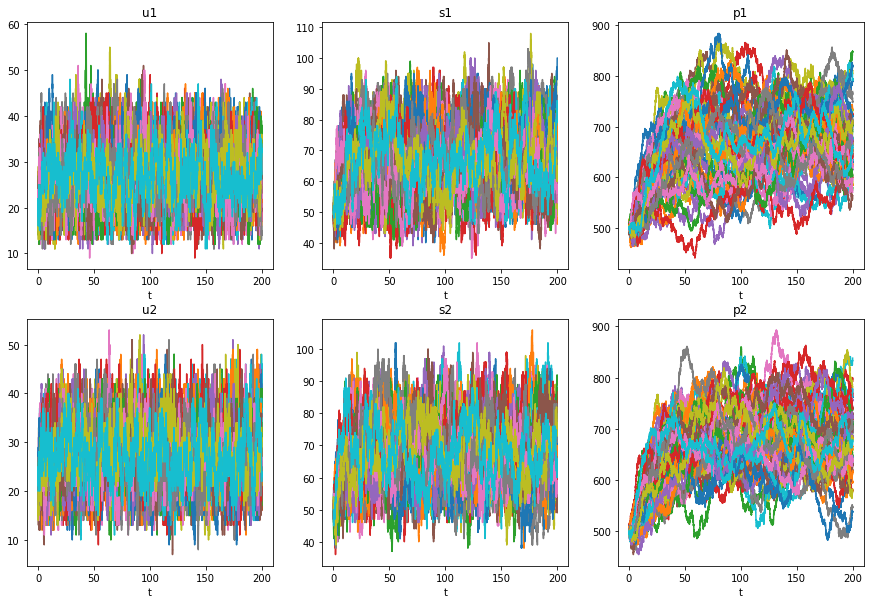

In [4]:
n_trajs = len(trajs_C)
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

for i in range(n_trajs):
    ax1.plot(trajs_T[i], trajs_C[i][0, :])
    ax2.plot(trajs_T[i], trajs_C[i][1, :])
    ax3.plot(trajs_T[i], trajs_C[i][8, :])
    ax4.plot(trajs_T[i], trajs_C[i][2, :])
    ax5.plot(trajs_T[i], trajs_C[i][3, :])
    ax6.plot(trajs_T[i], trajs_C[i][9, :])
ax1.set_xlabel('t')
ax1.set_title('u1')
ax2.set_xlabel('t')
ax2.set_title('s1')
ax3.set_xlabel('t')
ax3.set_title('p1')
ax4.set_xlabel('t')
ax4.set_title('u2')
ax5.set_xlabel('t')
ax5.set_title('s2')
ax6.set_xlabel('t')
ax6.set_title('p2')

In [5]:
C0 = []
for i in range(n_trajs):
    c0 = zeros(n_species)
    for j in range(n_species):
        c0[j] = trajs_C[i][j, -1]
    C0.append(c0)

## synthesize data after treatment

In [6]:
trajs_T, trajs_C = simulate(*list(params_treat_unlab.values()), C0=C0, t_span=[0, 410], n_traj=n_cell, report=True)

Text(0.5, 1.0, 'p2')

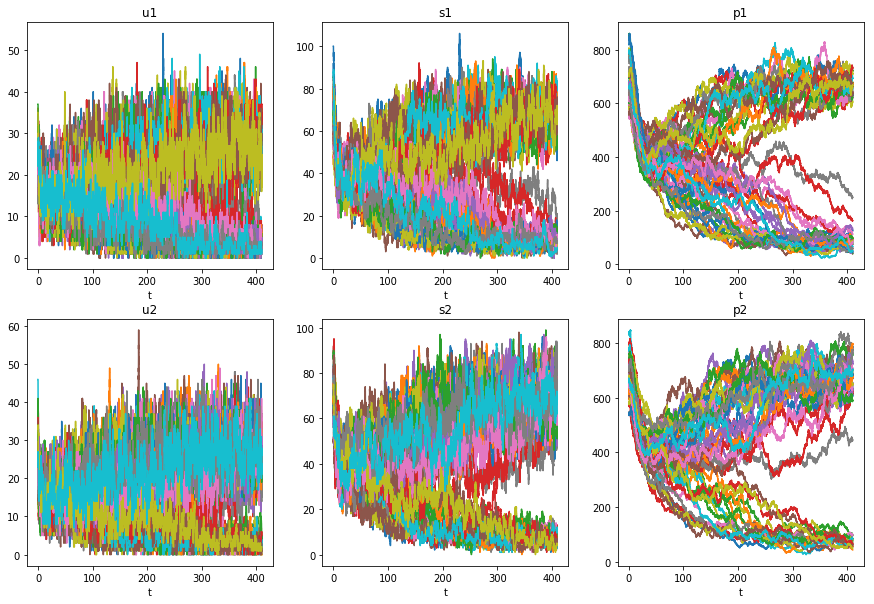

In [7]:
n_trajs = len(trajs_C)
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

for i in range(n_trajs):
    ax1.plot(trajs_T[i], trajs_C[i][0, :])
    ax2.plot(trajs_T[i], trajs_C[i][1, :])
    ax3.plot(trajs_T[i], trajs_C[i][8, :])
    ax4.plot(trajs_T[i], trajs_C[i][2, :])
    ax5.plot(trajs_T[i], trajs_C[i][3, :])
    ax6.plot(trajs_T[i], trajs_C[i][9, :])
ax1.set_xlabel('t')
ax1.set_title('u1')
ax2.set_xlabel('t')
ax2.set_title('s1')
ax3.set_xlabel('t')
ax3.set_title('p1')
ax4.set_xlabel('t')
ax4.set_title('u2')
ax5.set_xlabel('t')
ax5.set_title('s2')
ax6.set_xlabel('t')
ax6.set_title('p2')

In [8]:
# interpolate checkpoint data
T_CP = array([0, 5, 10, 40, 100, 200, 300, 400])
trajs_CP = temporal_interp(T_CP, trajs_T, trajs_C, round=True)

Text(0.5, 1.0, 'p2')

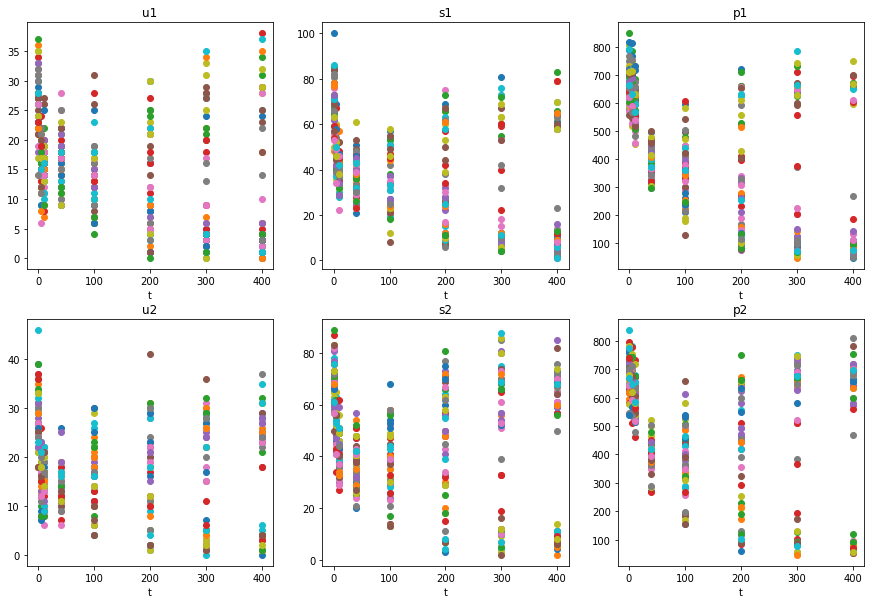

In [9]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

for i in range(n_trajs):
    ax1.plot(T_CP, trajs_CP[i][0, :], 'o')
    ax2.plot(T_CP, trajs_CP[i][1, :], 'o')
    ax3.plot(T_CP, trajs_CP[i][8, :], 'o')
    ax4.plot(T_CP, trajs_CP[i][2, :], 'o')
    ax5.plot(T_CP, trajs_CP[i][3, :], 'o')
    ax6.plot(T_CP, trajs_CP[i][9, :], 'o')
ax1.set_xlabel('t')
ax1.set_title('u1')
ax2.set_xlabel('t')
ax2.set_title('s1')
ax3.set_xlabel('t')
ax3.set_title('p1')
ax4.set_xlabel('t')
ax4.set_title('u2')
ax5.set_xlabel('t')
ax5.set_title('s2')
ax6.set_xlabel('t')
ax6.set_title('p2')

Text(0, 0.5, 'p2')

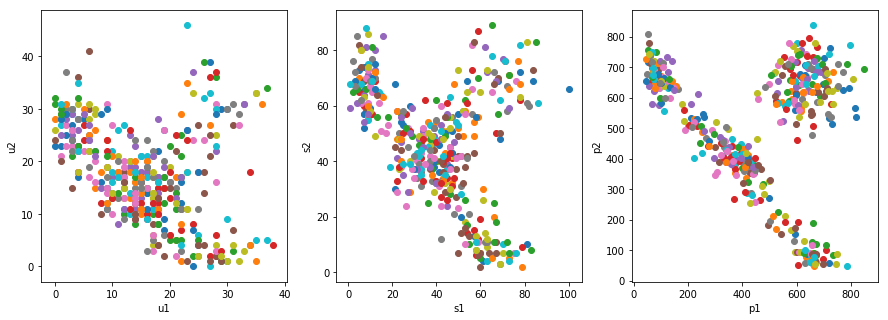

In [10]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for i in range(n_trajs):
    ax1.scatter(trajs_CP[i][0, :], trajs_CP[i][2, :])
    ax2.scatter(trajs_CP[i][1, :], trajs_CP[i][3, :])
    ax3.scatter(trajs_CP[i][8, :], trajs_CP[i][9, :])
ax1.set_xlabel('u1')
ax1.set_ylabel('u2')
ax2.set_xlabel('s1')
ax2.set_ylabel('s2')
ax3.set_xlabel('p1')
ax3.set_ylabel('p2')

## synthesize labeling data (kinetics) at each checkpoint

In [14]:
for i, t_cp in enumerate(T_CP):
    C0 = [trajs_CP[j][:, i] for j in range(n_trajs)]
    trajs_T, trajs_C = simulate(*list(params_treat_lab.values()), C0=C0, t_span=[0, 1.0], n_traj=n_cell, report=True)
    u = [trajs_C[j][(0, 2), -1] for j in range(n_trajs)]
    s = [trajs_C[j][(1, 3), -1] for j in range(n_trajs)]
    w = [trajs_C[j][(4, 6), -1] for j in range(n_trajs)]
    l = [trajs_C[j][(5, 7), -1] for j in range(n_trajs)]
    p = [trajs_C[j][(8, 9), -1] for j in range(n_trajs)]
    data_uu = pd.DataFrame(array(u).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
    data_su = pd.DataFrame(array(s).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
    data_ul = pd.DataFrame(array(w).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
    data_sl = pd.DataFrame(array(l).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
    data_pr = pd.DataFrame(array(p).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
    # write to file
    data_uu.to_csv('./data/simulated_scSlamSeq/uu_treated_kin_T%d.csv'%(t_cp), index=False)
    data_su.to_csv('./data/simulated_scSlamSeq/su_treated_kin_T%d.csv'%(t_cp), index=False)
    data_ul.to_csv('./data/simulated_scSlamSeq/ul_treated_kin_T%d.csv'%(t_cp), index=False)
    data_sl.to_csv('./data/simulated_scSlamSeq/sl_treated_kin_T%d.csv'%(t_cp), index=False)
    data_pr.to_csv('./data/simulated_scSlamSeq/pr_treated_kin_T%d.csv'%(t_cp), index=False)

Text(0.5, 1.0, 'p2')

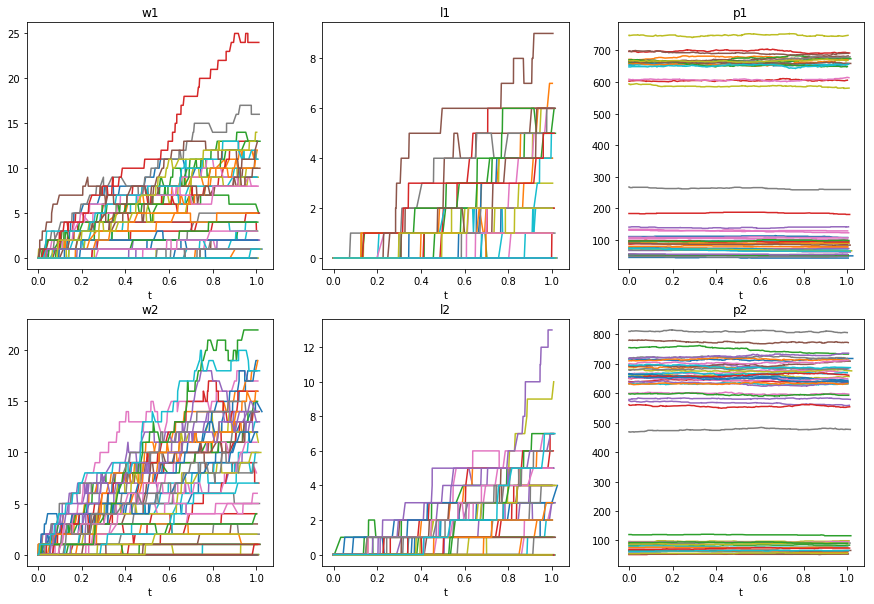

In [15]:
n_trajs = len(trajs_C)
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

for i in range(n_trajs):
    ax1.plot(trajs_T[i], trajs_C[i][4, :])
    ax2.plot(trajs_T[i], trajs_C[i][5, :])
    ax3.plot(trajs_T[i], trajs_C[i][8, :])
    ax4.plot(trajs_T[i], trajs_C[i][6, :])
    ax5.plot(trajs_T[i], trajs_C[i][7, :])
    ax6.plot(trajs_T[i], trajs_C[i][9, :])
ax1.set_xlabel('t')
ax1.set_title('w1')
ax2.set_xlabel('t')
ax2.set_title('l1')
ax3.set_xlabel('t')
ax3.set_title('p1')
ax4.set_xlabel('t')
ax4.set_title('w2')
ax5.set_xlabel('t')
ax5.set_title('l2')
ax6.set_xlabel('t')
ax6.set_title('p2')

Text(0.5, 1.0, 's2')

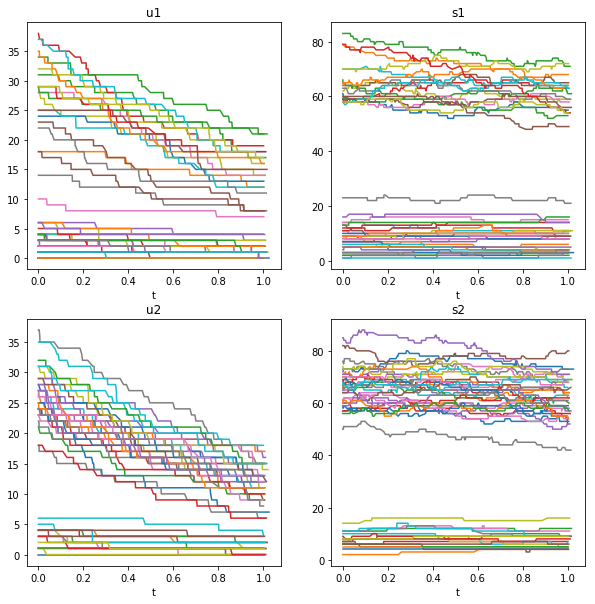

In [16]:
n_trajs = len(trajs_C)
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for i in range(n_trajs):
    ax1.plot(trajs_T[i], trajs_C[i][0, :])
    ax2.plot(trajs_T[i], trajs_C[i][1, :])
    ax3.plot(trajs_T[i], trajs_C[i][2, :])
    ax4.plot(trajs_T[i], trajs_C[i][3, :])
ax1.set_xlabel('t')
ax1.set_title('u1')
ax2.set_xlabel('t')
ax2.set_title('s1')
ax3.set_xlabel('t')
ax3.set_title('u2')
ax4.set_xlabel('t')
ax4.set_title('s2')

## synthesize labeling data (degradation) at the begining and the end

In [19]:
def syn_deg_data(i_t_cp, trajs_CP):
    C0 = [trajs_CP[j][:, i_t_cp] for j in range(n_trajs)]
    # label for 10 unit of time
    trajs_T, trajs_C = simulate(*list(params_treat_lab.values()), C0=C0, t_span=[0, 10], n_traj=n_cell, report=True)
    # stop labeling, and detect at t = 0, 1, 2, 4, 8
    C0 = [trajs_C[j][:, -1] for j in range(n_trajs)]
    trajs_T, trajs_C = simulate(*list(params_treat_unlab.values()), C0=C0, t_span=[0, 10], n_traj=n_cell, report=True)
    # interpolate labeling data
    Tl = array([0, 1, 2, 4, 8])
    trajs_C = temporal_interp(Tl, trajs_T, trajs_C, round=True)
    for i, t in enumerate(Tl):
        u = [trajs_C[j][(0, 2), i] for j in range(n_trajs)]
        s = [trajs_C[j][(1, 3), i] for j in range(n_trajs)]
        w = [trajs_C[j][(4, 6), i] for j in range(n_trajs)]
        l = [trajs_C[j][(5, 7), i] for j in range(n_trajs)]
        data_uu = pd.DataFrame(array(u).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
        data_su = pd.DataFrame(array(s).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
        data_ul = pd.DataFrame(array(w).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
        data_sl = pd.DataFrame(array(l).T, columns=['cell_%d'%(i+1) for i in range(n_trajs)])
        # write to file
        data_uu.to_csv('./data/simulated_scSlamSeq/uu_treated_deg_T%d_t%d.csv'%(T_CP[i_t_cp], t), index=False)
        data_su.to_csv('./data/simulated_scSlamSeq/su_treated_deg_T%d_t%d.csv'%(T_CP[i_t_cp], t), index=False)
        data_ul.to_csv('./data/simulated_scSlamSeq/ul_treated_deg_T%d_t%d.csv'%(T_CP[i_t_cp], t), index=False)
        data_sl.to_csv('./data/simulated_scSlamSeq/sl_treated_deg_T%d_t%d.csv'%(T_CP[i_t_cp], t), index=False)

In [20]:
# at the beginning
syn_deg_data(0, trajs_CP)
# at the end
syn_deg_data(-1, trajs_CP)